### The theory  

Let's start by defining the discrete-time state-space model $X_{k+1} = f(X_k)$ (where $X_k$ is a vector of the position and the translational and rotational velocities, i.e. $X_k = [P_k; V_k]$), assuming a fixed sampling time $T_s$, with the quantities of interest (position and speed)

Let the state $X_k$ contain the position $P_k = (x_k, y_k, \theta_k) $ with $x_k$, $y_k$ in mm and the orientation $\theta_k$ in rad, and the velocities $V_k = (\dot x_k, \dot y_k, \dot\theta_k)$ with the translational speeds $\dot x_k, \dot y_k$  in mm/s and the rotationnal speed $\dot\theta_k$ in rad/s. The linear discrete-time state-space model is : 

$X_{k+1}= A X_k + W_k $
   
where $W_k$ is the process noise with mean zero and covariance $Q$.
<br>
For simplicity we assume that all the process noises are independent. Hence $Q$ is diagonal.

where $ Q = \begin{bmatrix} q_x & 0 & 0 & 0 & 0 & 0\\ 0 & q_y & 0 & 0 & 0 & 0 \\ 0 & 0 & q_\theta & 0 & 0 & 0 \\ 
0 & 0 & 0 & q_\dot x & 0 & 0 \\ 0 & 0 & 0 & 0 & q_\dot y & 0 \\ 0 & 0 & 0 & 0 & 0 & q_\dot\theta \end{bmatrix} $



To implement the Kalman Filter one need to distinguish two different scenarios :

1. When the camera is online : the measurements at our disposal are the position and translational and rotational speed of the robot.
2. When the camera is offline : the measurements at our disposal are only the translational and rotational speed of the robot.


We therefore consider 2 different measurements $Y_k = HX_k + N_k$, one per scenario, where $N_k$ is the measurement noise with zero mean and covariance $R$

**1. When the camera is online  the measurements $Y^{ON}$ is given by :** <br>
  $Y_k^{ON} = H^{ON} X_k + N_k^{ON} = \begin{bmatrix} 1 & 0 & 0 & 0 & 0 & 0\\ 0 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 \end{bmatrix}X_k+N_k^{ON}$

  where $N_k^{ON}$  is the measurement noise with zero mean and covariance $R^{ON}$. 
  <br>
  For simplicity we assume that all the measurement noises are independent.
  <br>
  Hence $R^{ON}$ is a diagonal matrix, $R^{ON} = \begin{bmatrix} r_x & 0 & 0 & 0 & 0 & 0\\ 0 & r_y & 0 & 0 & 0 & 0 \\ 0 & 0 & r_\theta & 0 & 0 & 0 \\ 
  0 & 0 & 0 & r_\dot x & 0 & 0 \\ 0 & 0 & 0 & 0 & r_\dot y & 0 \\ 0 & 0 & 0 & 0 & 0 & r_\dot\theta \end{bmatrix}$
  <br>
  with :
  <br>
  $r_x = 0.025 $ mm² <br>
  $r_y = 0.18 $ mm² <br>
  $r_\theta =  0.00057 $ rad² <br>
  $r_\dot x = 1.1 $ mm²/s² <br>
  $r_\dot y = 1.1 $ mm²/s² <br>
  $r_\dot \theta = 0.00087 $ rad²/s² 

**2. When the camera is offline  the measurements $Y^{OFF}$ is given by :** <br>
  $Y_k^{OFF} = H^{OFF}X_k + N_k^{OFF} =  \begin{bmatrix} 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 
  \\ 0 & 0 & 0 & 0 & 0 & 1\end{bmatrix}x_k+N_k^{OFF}$

  where $N_k^{OFF}$  is the measurement noise with zero mean and covariance $R^{OFF}$. 
  <br>
  For simplicity we assume that all the measurement noises are independent.
  <br>
  Hence $R^{OFF}$ is a diagonal matrix, $R^{OFF} = \begin{bmatrix} r_\dot x & 0 & 0\\ 0 & r_\dot y & 0 \\ 0 & 0 & r_\dot\theta \end{bmatrix}$
  <br>
  with :
  <br>
  $r_\dot x = 1.1 $ mm²/s² <br>
  $r_\dot y = 1.1 $ mm²/s² <br>
  $r_\dot \theta = 0.00087 $ rad²/s² 
            

We choose to only allow Thymio to go forward or rotate on itself, consequently :  

**The linear discrete-time state-space model when Thymio is going forward is :** 

  $X_{k+1}= A^F X_k + W_k = \begin{bmatrix} 1 & 0 & 0 & T_s & 0 & 0\\ 0 & 1 & 0 & 0 & T_s & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 \\ 
0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 \end{bmatrix}X_k+W_k $

  
      
      
**The linear discrete-time state-space model when Thymio is rotating on itself :**

  $X_{k+1}= A^R X_k + W_k = \begin{bmatrix} 1 & 0 & 0 & 0 & 0 & 0\\ 0 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & T_s \\ 
0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 \end{bmatrix}X_k+W_k $

For the process noises with covariance Q, we have also : 
<br>
<br>
  $ Q = \begin{bmatrix} q_x & 0 & 0 & 0 & 0 & 0\\ 0 & q_y & 0 & 0 & 0 & 0 \\ 0 & 0 & q_\theta & 0 & 0 & 0 \\ 
  0 & 0 & 0 & q_\dot x & 0 & 0 \\ 0 & 0 & 0 & 0 & q_\dot y & 0 \\ 0 & 0 & 0 & 0 & 0 & q_\dot\theta \end{bmatrix} $
  <br>
  with :
  <br>
  
$q_x = 0.011 $ mm² <br>
$q_y =  0.011 $ mm² <br>
$q_\theta = 0.0000087 $ rad² <br>
$q_\dot x = 1.1 $ mm²/s² <br>
$q_\dot y =  1.1 $ mm²/s² <br>
$q_\dot \theta = 0.00087 $ rad²/s² <br>
  <br>

# Calibration of Thymio

### Speed constants : 

By measuring the time for Thymio to travel controlled distances and to rotate controlled rotations we achieved to compute the two following constants that convert Thymio speed in a speed in mm/s for translation and in a speed in rad/s for rotation.

**Thymio rotation speed is 0.71 rad/s for a speed command of 100/-100.**
<br>
**To go from Thymio speed to rad/s, the conversion factor is thymio_speed_to_rads = 0.0071**

In [3]:
thymio_speed_to_rads = 0.0071

**Thymio's speed is 36 mm/s for a command of 100**
<br>
**To go from Thymio speed to mm/s, the conversion factor is  thymio_speed_to_mms = 0.36**

In [4]:
thymio_speed_to_mms = 0.36

**We noticed that to allow Thymio to forward with a command of 100, we need to input 102 to the left wheel and 98 to the right wheel.**

### Code to use to calibrate Thymio when needed :  

In [1]:
import sys, os
sys.path.insert(0, os.path.join(os.getcwd(), 'src'))
from timer import *
from motion import *

# Import tdmclient Notebook environment:
import tdmclient.notebook
await tdmclient.notebook.start()

In [2]:
%%run_python

state = 1

@onevent
def move(speed_left, speed_right):
    global motor_left_target, motor_right_target, state
    if state == 1 :
        motor_left_target = speed_left
        motor_right_target = speed_right
    
@onevent 
def button_center():
    global state, motor_left_target, motor_right_target
    state = 0
    motor_left_target = 0
    motor_right_target = 0

In [3]:
def send_command():
    global step, rt
    if step < len(command) :
        if command[step][0] == command[step][1] and command[step][0] != 0:
            send_event("move", command[step][0] + 2, command[step][1] - 2)
        else :
            send_event("move", command[step][0], command[step][1])
            
        step += 1
        
    else :
        rt.stop()
    

step = 0
command = turn_left(4*math.pi) + [[0, 0]]
#command = move_forward(1000) + [[0, 0]]

rt = RepeatedTimer(Ts, send_command)

### Determination of the variances : 

In [1]:
import math, sys, os
import time
import matplotlib.pyplot as plt
import numpy as np

sys.path.insert(0, os.path.join(os.getcwd(), 'src'))
from timer import *
from motion import *

In [2]:
import tdmclient.notebook
from tdmclient import ClientAsync
client = ClientAsync()
node = await client.wait_for_node()
await node.lock()

Node 6ea4d2ee-c528-4a1a-bb20-88c043bafb8d

In [2]:
def motors(left, right):
    return {
        "motor.left.target": [left],
        "motor.right.target": [right],
    }

def get_data(thymio_data):
    thymio_data.append({ "left_speed":node["motor.left.speed"],
                        "right_speed":node["motor.right.speed"]})
    
measure = False

**Measure the translational and rotational speed variance when Thymio goes forward :**

In [3]:
thymio_data_forward = []
if measure :
    await node.wait_for_variables() # wait for Thymio variables values
    rt = RepeatedTimer(Ts, get_data, thymio_data_forward) # it auto-starts, no need of rt.start()

    try:
        # time.sleep would not work here, use asynchronous client.sleep method instead
        await client.sleep(5)
        node.send_set_variables(motors(102, 98))
        await client.sleep(25) # your long-running job goes here...
    finally:
        rt.stop() # better in a try/finally block to make sure the program ends!
        node.send_set_variables(motors(0, 0))
else :
    thymio_data_forward = [{'left_speed': -7, 'right_speed': 0}, {'left_speed': -8, 'right_speed': 0}, {'left_speed': -6, 'right_speed': 0}, {'left_speed': -6, 'right_speed': 0}, {'left_speed': 2, 'right_speed': 0}, {'left_speed': -2, 'right_speed': 0}, {'left_speed': -7, 'right_speed': 0}, {'left_speed': -7, 'right_speed': 0}, {'left_speed': -6, 'right_speed': 0}, {'left_speed': -7, 'right_speed': 0}, {'left_speed': -6, 'right_speed': 0}, {'left_speed': -7, 'right_speed': 0}, {'left_speed': -7, 'right_speed': 0}, {'left_speed': -7, 'right_speed': 0}, {'left_speed': -4, 'right_speed': 0}, {'left_speed': -6, 'right_speed': 0}, {'left_speed': -7, 'right_speed': 0}, {'left_speed': -7, 'right_speed': 0}, {'left_speed': -6, 'right_speed': 0}, {'left_speed': -7, 'right_speed': 0}, {'left_speed': -9, 'right_speed': 0}, {'left_speed': -7, 'right_speed': 0}, {'left_speed': -6, 'right_speed': 0}, {'left_speed': 1, 'right_speed': 0}, {'left_speed': -7, 'right_speed': 0}, {'left_speed': -7, 'right_speed': 0}, {'left_speed': -7, 'right_speed': 0}, {'left_speed': -7, 'right_speed': 0}, {'left_speed': -7, 'right_speed': 0}, {'left_speed': -6, 'right_speed': 0}, {'left_speed': -6, 'right_speed': 0}, {'left_speed': -6, 'right_speed': 0}, {'left_speed': -2, 'right_speed': 0}, {'left_speed': -6, 'right_speed': 0}, {'left_speed': -7, 'right_speed': 0}, {'left_speed': -4, 'right_speed': 0}, {'left_speed': -7, 'right_speed': 0}, {'left_speed': -8, 'right_speed': 0}, {'left_speed': -5, 'right_speed': 0}, {'left_speed': -6, 'right_speed': 0}, {'left_speed': -7, 'right_speed': 0}, {'left_speed': -6, 'right_speed': 0}, {'left_speed': -6, 'right_speed': 0}, {'left_speed': -7, 'right_speed': 0}, {'left_speed': -8, 'right_speed': 0}, {'left_speed': 2, 'right_speed': 8}, {'left_speed': 79, 'right_speed': 72}, {'left_speed': 90, 'right_speed': 83}, {'left_speed': 102, 'right_speed': 87}, {'left_speed': 106, 'right_speed': 97}, {'left_speed': 101, 'right_speed': 98}, {'left_speed': 94, 'right_speed': 98}, {'left_speed': 104, 'right_speed': 92}, {'left_speed': 102, 'right_speed': 100}, {'left_speed': 95, 'right_speed': 88}, {'left_speed': 91, 'right_speed': 98}, {'left_speed': 98, 'right_speed': 99}, {'left_speed': 119, 'right_speed': 97}, {'left_speed': 93, 'right_speed': 99}, {'left_speed': 91, 'right_speed': 91}, {'left_speed': 104, 'right_speed': 104}, {'left_speed': 97, 'right_speed': 90}, {'left_speed': 89, 'right_speed': 98}, {'left_speed': 92, 'right_speed': 98}, {'left_speed': 98, 'right_speed': 98}, {'left_speed': 94, 'right_speed': 98}, {'left_speed': 98, 'right_speed': 91}, {'left_speed': 111, 'right_speed': 102}, {'left_speed': 89, 'right_speed': 92}, {'left_speed': 108, 'right_speed': 96}, {'left_speed': 104, 'right_speed': 95}, {'left_speed': 91, 'right_speed': 98}, {'left_speed': 103, 'right_speed': 96}, {'left_speed': 97, 'right_speed': 92}, {'left_speed': 97, 'right_speed': 99}, {'left_speed': 109, 'right_speed': 97}, {'left_speed': 102, 'right_speed': 98}, {'left_speed': 105, 'right_speed': 102}, {'left_speed': 101, 'right_speed': 90}, {'left_speed': 96, 'right_speed': 108}, {'left_speed': 104, 'right_speed': 91}, {'left_speed': 103, 'right_speed': 109}, {'left_speed': 93, 'right_speed': 98}, {'left_speed': 91, 'right_speed': 99}, {'left_speed': 107, 'right_speed': 97}, {'left_speed': 83, 'right_speed': 97}, {'left_speed': 102, 'right_speed': 99}, {'left_speed': 101, 'right_speed': 98}, {'left_speed': 94, 'right_speed': 99}, {'left_speed': 81, 'right_speed': 92}, {'left_speed': 99, 'right_speed': 98}, {'left_speed': 88, 'right_speed': 110}, {'left_speed': 87, 'right_speed': 98}, {'left_speed': 122, 'right_speed': 104}, {'left_speed': 100, 'right_speed': 96}, {'left_speed': 86, 'right_speed': 98}, {'left_speed': 110, 'right_speed': 98}, {'left_speed': 101, 'right_speed': 97}, {'left_speed': 85, 'right_speed': 105}, {'left_speed': 122, 'right_speed': 96}, {'left_speed': 100, 'right_speed': 102}, {'left_speed': 88, 'right_speed': 95}, {'left_speed': 124, 'right_speed': 97}, {'left_speed': 92, 'right_speed': 96}, {'left_speed': 93, 'right_speed': 97}, {'left_speed': 116, 'right_speed': 98}, {'left_speed': 101, 'right_speed': 97}, {'left_speed': 91, 'right_speed': 101}, {'left_speed': 101, 'right_speed': 95}, {'left_speed': 91, 'right_speed': 102}, {'left_speed': 91, 'right_speed': 99}, {'left_speed': 105, 'right_speed': 98}, {'left_speed': 84, 'right_speed': 99}, {'left_speed': 95, 'right_speed': 87}, {'left_speed': 101, 'right_speed': 99}, {'left_speed': 97, 'right_speed': 86}, {'left_speed': 98, 'right_speed': 97}, {'left_speed': 101, 'right_speed': 98}, {'left_speed': 89, 'right_speed': 99}, {'left_speed': 118, 'right_speed': 99}, {'left_speed': 91, 'right_speed': 90}, {'left_speed': 98, 'right_speed': 99}, {'left_speed': 119, 'right_speed': 97}, {'left_speed': 91, 'right_speed': 94}, {'left_speed': 108, 'right_speed': 97}, {'left_speed': 100, 'right_speed': 92}, {'left_speed': 132, 'right_speed': 101}, {'left_speed': 88, 'right_speed': 98}, {'left_speed': 98, 'right_speed': 98}, {'left_speed': 105, 'right_speed': 99}, {'left_speed': 98, 'right_speed': 93}, {'left_speed': 113, 'right_speed': 97}, {'left_speed': 93, 'right_speed': 92}, {'left_speed': 99, 'right_speed': 98}, {'left_speed': 110, 'right_speed': 96}, {'left_speed': 91, 'right_speed': 98}, {'left_speed': 102, 'right_speed': 98}, {'left_speed': 92, 'right_speed': 96}, {'left_speed': 91, 'right_speed': 99}, {'left_speed': 99, 'right_speed': 90}, {'left_speed': 110, 'right_speed': 110}, {'left_speed': 99, 'right_speed': 96}, {'left_speed': 107, 'right_speed': 97}, {'left_speed': 87, 'right_speed': 99}, {'left_speed': 108, 'right_speed': 96}, {'left_speed': 111, 'right_speed': 107}, {'left_speed': 93, 'right_speed': 93}, {'left_speed': 101, 'right_speed': 96}, {'left_speed': 111, 'right_speed': 99}, {'left_speed': 96, 'right_speed': 98}, {'left_speed': 91, 'right_speed': 99}, {'left_speed': 103, 'right_speed': 92}, {'left_speed': 99, 'right_speed': 108}, {'left_speed': 81, 'right_speed': 93}, {'left_speed': 101, 'right_speed': 99}, {'left_speed': 104, 'right_speed': 98}, {'left_speed': 91, 'right_speed': 96}, {'left_speed': 96, 'right_speed': 96}, {'left_speed': 109, 'right_speed': 93}, {'left_speed': 91, 'right_speed': 100}, {'left_speed': 114, 'right_speed': 92}, {'left_speed': 93, 'right_speed': 98}, {'left_speed': 97, 'right_speed': 99}, {'left_speed': 114, 'right_speed': 91}, {'left_speed': 90, 'right_speed': 102}, {'left_speed': 92, 'right_speed': 104}, {'left_speed': 102, 'right_speed': 99}, {'left_speed': 106, 'right_speed': 100}, {'left_speed': 96, 'right_speed': 96}, {'left_speed': 105, 'right_speed': 99}, {'left_speed': 102, 'right_speed': 95}, {'left_speed': 94, 'right_speed': 97}, {'left_speed': 119, 'right_speed': 95}, {'left_speed': 96, 'right_speed': 91}, {'left_speed': 113, 'right_speed': 97}, {'left_speed': 111, 'right_speed': 91}, {'left_speed': 92, 'right_speed': 98}, {'left_speed': 97, 'right_speed': 95}, {'left_speed': 112, 'right_speed': 99}, {'left_speed': 95, 'right_speed': 98}, {'left_speed': 112, 'right_speed': 92}, {'left_speed': 90, 'right_speed': 99}, {'left_speed': 91, 'right_speed': 92}, {'left_speed': 108, 'right_speed': 99}, {'left_speed': 103, 'right_speed': 96}, {'left_speed': 93, 'right_speed': 97}, {'left_speed': 109, 'right_speed': 95}, {'left_speed': 106, 'right_speed': 101}, {'left_speed': 98, 'right_speed': 98}, {'left_speed': 111, 'right_speed': 99}, {'left_speed': 92, 'right_speed': 98}, {'left_speed': 111, 'right_speed': 98}, {'left_speed': 100, 'right_speed': 96}, {'left_speed': 91, 'right_speed': 98}, {'left_speed': 105, 'right_speed': 95}, {'left_speed': 105, 'right_speed': 95}, {'left_speed': 82, 'right_speed': 98}, {'left_speed': 104, 'right_speed': 97}, {'left_speed': 91, 'right_speed': 100}, {'left_speed': 105, 'right_speed': 97}, {'left_speed': 106, 'right_speed': 103}, {'left_speed': 89, 'right_speed': 93}, {'left_speed': 95, 'right_speed': 99}, {'left_speed': 92, 'right_speed': 98}, {'left_speed': 95, 'right_speed': 96}, {'left_speed': 87, 'right_speed': 100}, {'left_speed': 102, 'right_speed': 93}, {'left_speed': 110, 'right_speed': 99}, {'left_speed': 95, 'right_speed': 93}, {'left_speed': 102, 'right_speed': 98}, {'left_speed': 109, 'right_speed': 99}, {'left_speed': 92, 'right_speed': 90}, {'left_speed': 94, 'right_speed': 99}, {'left_speed': 111, 'right_speed': 96}, {'left_speed': 111, 'right_speed': 104}, {'left_speed': 90, 'right_speed': 93}, {'left_speed': 114, 'right_speed': 99}, {'left_speed': 89, 'right_speed': 95}, {'left_speed': 98, 'right_speed': 98}, {'left_speed': 101, 'right_speed': 101}, {'left_speed': 89, 'right_speed': 94}, {'left_speed': 110, 'right_speed': 102}, {'left_speed': 102, 'right_speed': 99}, {'left_speed': 98, 'right_speed': 98}, {'left_speed': 113, 'right_speed': 96}, {'left_speed': 98, 'right_speed': 98}, {'left_speed': 105, 'right_speed': 99}, {'left_speed': 111, 'right_speed': 90}, {'left_speed': 91, 'right_speed': 99}, {'left_speed': 103, 'right_speed': 96}, {'left_speed': 106, 'right_speed': 95}, {'left_speed': 91, 'right_speed': 99}, {'left_speed': 103, 'right_speed': 90}, {'left_speed': 86, 'right_speed': 101}, {'left_speed': 112, 'right_speed': 97}, {'left_speed': 92, 'right_speed': 98}, {'left_speed': 107, 'right_speed': 96}, {'left_speed': 93, 'right_speed': 88}, {'left_speed': 90, 'right_speed': 102}, {'left_speed': 101, 'right_speed': 91}, {'left_speed': 121, 'right_speed': 98}, {'left_speed': 106, 'right_speed': 97}, {'left_speed': 97, 'right_speed': 98}, {'left_speed': 116, 'right_speed': 98}, {'left_speed': 100, 'right_speed': 91}, {'left_speed': 98, 'right_speed': 108}, {'left_speed': 124, 'right_speed': 100}, {'left_speed': 93, 'right_speed': 97}, {'left_speed': 101, 'right_speed': 98}, {'left_speed': 113, 'right_speed': 92}, {'left_speed': 90, 'right_speed': 100}, {'left_speed': 123, 'right_speed': 95}, {'left_speed': 90, 'right_speed': 99}, {'left_speed': 87, 'right_speed': 102}, {'left_speed': 119, 'right_speed': 96}, {'left_speed': 89, 'right_speed': 104}, {'left_speed': 104, 'right_speed': 91}, {'left_speed': 107, 'right_speed': 112}, {'left_speed': 97, 'right_speed': 93}, {'left_speed': 118, 'right_speed': 99}, {'left_speed': 96, 'right_speed': 98}, {'left_speed': 93, 'right_speed': 98}, {'left_speed': 108, 'right_speed': 98}, {'left_speed': 111, 'right_speed': 90}, {'left_speed': 99, 'right_speed': 100}, {'left_speed': 105, 'right_speed': 96}, {'left_speed': 82, 'right_speed': 97}, {'left_speed': 104, 'right_speed': 99}, {'left_speed': 105, 'right_speed': 92}, {'left_speed': 81, 'right_speed': 100}, {'left_speed': 108, 'right_speed': 95}, {'left_speed': 100, 'right_speed': 99}, {'left_speed': 87, 'right_speed': 101}]

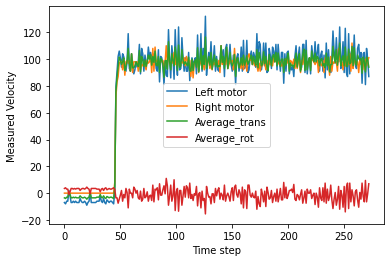

In [4]:
l_speed = [x["left_speed"] for x in thymio_data_forward]
r_speed = [x["right_speed"] for x in thymio_data_forward]
avg_speed_trans = [(x["left_speed"]+ x["right_speed"])/2 for x in thymio_data_forward]
avg_speed_rot = [(x["right_speed"] - x["left_speed"])/2 for x in thymio_data_forward]
plt.plot(l_speed, label="Left motor")
plt.plot(r_speed, label="Right motor")
plt.plot(avg_speed_trans, label="Average_trans")
plt.plot(avg_speed_rot, label="Average_rot")
plt.xlabel("Time step")
plt.ylabel("Measured Velocity")
plt.legend()

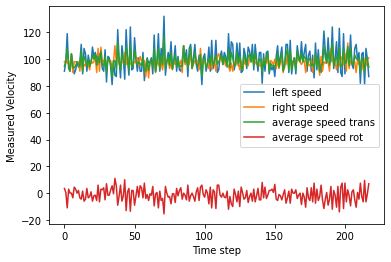

In [5]:
plt.plot(l_speed[55:], label="left speed")
plt.plot(r_speed[55:], label="right speed")
plt.plot(avg_speed_trans[55:], label="average speed trans")
plt.plot(avg_speed_rot[55:], label="average speed rot")
plt.xlabel("Time step")
plt.ylabel("Measured Velocity")
plt.legend()

In [6]:
var_speed_trans = np.var(avg_speed_trans[55:]) * thymio_speed_to_mms**2
var_speed_rot = np.var(avg_speed_rot[55:]) * thymio_speed_to_rads **2

print("The translational speed variance in mm^2/s^2 is {}".format(var_speed_trans))
print("The rotational speed variance in rad^2/s^2 is {}".format(var_speed_rot))

The translational speed variance in mm^2/s^2 is 3.5519116993519058
The rotational speed variance in rad^2/s^2 is 0.0013893312202781752


 **Assuming that half of the variance is caused by the measurements and half is caused by perturbations to the states, this gives us :**

In [7]:
q_F_x_dot = var_speed_trans/4 # variance on speed state
q_F_y_dot = var_speed_trans/4 # variance on speed state
r_F_x_dot = var_speed_trans/4 # variance on speed measurement
r_F_y_dot = var_speed_trans/4 # variance on speed measurement

q_F_theta_dot = var_speed_rot/2 # variance on speed state
r_F_theta_dot = var_speed_rot/2 # variance on speed measurement
print("q_F_x_dot = {} mm^2/s^2".format(q_F_x_dot))
print("q_F_theta_dot = {} rad^2/s^2 ".format(q_F_theta_dot))

q_F_x_dot = 0.8879779248379764 mm^2/s^2
q_F_theta_dot = 0.0006946656101390876 rad^2/s^2 


**Measure the speed variance when Thymio rotates :**

In [8]:
thymio_data_turn = []
if measure :
    await node.wait_for_variables() # wait for Thymio variables values
    rt = RepeatedTimer(Ts, get_data, thymio_data_turn) # it auto-starts, no need of rt.start()

    try:
        # time.sleep would not work here, use asynchronous client.sleep method instead
        await client.sleep(5)
        node.send_set_variables(motors(100, -100))
        await client.sleep(25) # your long-running job goes here...
    finally:
        rt.stop() # better in a try/finally block to make sure the program ends!
        node.send_set_variables(motors(0, 0))
else :
    thymio_data_turn = [{'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': -2, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 79, 'right_speed': -67}, {'left_speed': 91, 'right_speed': -91}, {'left_speed': 92, 'right_speed': -87}, {'left_speed': 97, 'right_speed': -96}, {'left_speed': 100, 'right_speed': -103}, {'left_speed': 85, 'right_speed': -94}, {'left_speed': 104, 'right_speed': -97}, {'left_speed': 85, 'right_speed': -98}, {'left_speed': 90, 'right_speed': -99}, {'left_speed': 90, 'right_speed': -94}, {'left_speed': 106, 'right_speed': -90}, {'left_speed': 85, 'right_speed': -99}, {'left_speed': 109, 'right_speed': -110}, {'left_speed': 94, 'right_speed': -103}, {'left_speed': 106, 'right_speed': -93}, {'left_speed': 94, 'right_speed': -97}, {'left_speed': 106, 'right_speed': -121}, {'left_speed': 93, 'right_speed': -98}, {'left_speed': 106, 'right_speed': -95}, {'left_speed': 99, 'right_speed': -114}, {'left_speed': 103, 'right_speed': -97}, {'left_speed': 98, 'right_speed': -87}, {'left_speed': 99, 'right_speed': -88}, {'left_speed': 98, 'right_speed': -88}, {'left_speed': 100, 'right_speed': -96}, {'left_speed': 108, 'right_speed': -119}, {'left_speed': 97, 'right_speed': -94}, {'left_speed': 106, 'right_speed': -112}, {'left_speed': 88, 'right_speed': -107}, {'left_speed': 107, 'right_speed': -89}, {'left_speed': 113, 'right_speed': -88}, {'left_speed': 94, 'right_speed': -107}, {'left_speed': 105, 'right_speed': -95}, {'left_speed': 92, 'right_speed': -88}, {'left_speed': 104, 'right_speed': -80}, {'left_speed': 93, 'right_speed': -92}, {'left_speed': 107, 'right_speed': -117}, {'left_speed': 93, 'right_speed': -92}, {'left_speed': 106, 'right_speed': -86}, {'left_speed': 94, 'right_speed': -85}, {'left_speed': 108, 'right_speed': -104}, {'left_speed': 99, 'right_speed': -118}, {'left_speed': 105, 'right_speed': -94}, {'left_speed': 99, 'right_speed': -90}, {'left_speed': 96, 'right_speed': -97}, {'left_speed': 109, 'right_speed': -98}, {'left_speed': 97, 'right_speed': -109}, {'left_speed': 97, 'right_speed': -89}, {'left_speed': 100, 'right_speed': -98}, {'left_speed': 93, 'right_speed': -125}, {'left_speed': 101, 'right_speed': -107}, {'left_speed': 99, 'right_speed': -109}, {'left_speed': 96, 'right_speed': -107}, {'left_speed': 99, 'right_speed': -92}, {'left_speed': 96, 'right_speed': -87}, {'left_speed': 105, 'right_speed': -88}, {'left_speed': 99, 'right_speed': -96}, {'left_speed': 109, 'right_speed': -106}, {'left_speed': 88, 'right_speed': -112}, {'left_speed': 103, 'right_speed': -97}, {'left_speed': 93, 'right_speed': -91}, {'left_speed': 107, 'right_speed': -95}, {'left_speed': 97, 'right_speed': -86}, {'left_speed': 107, 'right_speed': -94}, {'left_speed': 98, 'right_speed': -96}, {'left_speed': 101, 'right_speed': -97}, {'left_speed': 92, 'right_speed': -108}, {'left_speed': 104, 'right_speed': -104}, {'left_speed': 94, 'right_speed': -93}, {'left_speed': 112, 'right_speed': -91}, {'left_speed': 94, 'right_speed': -96}, {'left_speed': 103, 'right_speed': -109}, {'left_speed': 99, 'right_speed': -94}, {'left_speed': 95, 'right_speed': -80}, {'left_speed': 99, 'right_speed': -87}, {'left_speed': 96, 'right_speed': -95}, {'left_speed': 111, 'right_speed': -121}, {'left_speed': 85, 'right_speed': -112}, {'left_speed': 100, 'right_speed': -90}, {'left_speed': 84, 'right_speed': -98}, {'left_speed': 112, 'right_speed': -110}, {'left_speed': 85, 'right_speed': -93}, {'left_speed': 106, 'right_speed': -89}, {'left_speed': 85, 'right_speed': -96}, {'left_speed': 103, 'right_speed': -100}, {'left_speed': 86, 'right_speed': -101}, {'left_speed': 107, 'right_speed': -84}, {'left_speed': 85, 'right_speed': -82}, {'left_speed': 112, 'right_speed': -91}, {'left_speed': 93, 'right_speed': -90}, {'left_speed': 113, 'right_speed': -100}, {'left_speed': 94, 'right_speed': -99}, {'left_speed': 106, 'right_speed': -128}, {'left_speed': 93, 'right_speed': -114}, {'left_speed': 107, 'right_speed': -113}, {'left_speed': 98, 'right_speed': -93}, {'left_speed': 95, 'right_speed': -96}, {'left_speed': 97, 'right_speed': -109}, {'left_speed': 87, 'right_speed': -105}, {'left_speed': 105, 'right_speed': -95}, {'left_speed': 85, 'right_speed': -92}, {'left_speed': 107, 'right_speed': -86}, {'left_speed': 93, 'right_speed': -86}, {'left_speed': 107, 'right_speed': -94}, {'left_speed': 94, 'right_speed': -113}, {'left_speed': 106, 'right_speed': -110}, {'left_speed': 93, 'right_speed': -87}, {'left_speed': 104, 'right_speed': -102}, {'left_speed': 90, 'right_speed': -89}, {'left_speed': 108, 'right_speed': -89}, {'left_speed': 84, 'right_speed': -88}, {'left_speed': 110, 'right_speed': -92}, {'left_speed': 86, 'right_speed': -98}, {'left_speed': 107, 'right_speed': -118}, {'left_speed': 91, 'right_speed': -113}, {'left_speed': 104, 'right_speed': -116}, {'left_speed': 86, 'right_speed': -87}, {'left_speed': 102, 'right_speed': -100}, {'left_speed': 93, 'right_speed': -113}, {'left_speed': 106, 'right_speed': -92}, {'left_speed': 93, 'right_speed': -92}, {'left_speed': 106, 'right_speed': -112}, {'left_speed': 94, 'right_speed': -93}, {'left_speed': 106, 'right_speed': -91}, {'left_speed': 98, 'right_speed': -85}, {'left_speed': 106, 'right_speed': -89}, {'left_speed': 99, 'right_speed': -108}, {'left_speed': 96, 'right_speed': -98}, {'left_speed': 99, 'right_speed': -96}, {'left_speed': 98, 'right_speed': -100}, {'left_speed': 101, 'right_speed': -91}, {'left_speed': 100, 'right_speed': -98}, {'left_speed': 103, 'right_speed': -104}, {'left_speed': 83, 'right_speed': -96}, {'left_speed': 105, 'right_speed': -107}, {'left_speed': 86, 'right_speed': -93}, {'left_speed': 108, 'right_speed': -93}, {'left_speed': 82, 'right_speed': -106}, {'left_speed': 102, 'right_speed': -83}, {'left_speed': 92, 'right_speed': -92}, {'left_speed': 107, 'right_speed': -85}, {'left_speed': 92, 'right_speed': -90}, {'left_speed': 105, 'right_speed': -88}, {'left_speed': 99, 'right_speed': -100}, {'left_speed': 106, 'right_speed': -98}, {'left_speed': 99, 'right_speed': -113}, {'left_speed': 99, 'right_speed': -98}, {'left_speed': 99, 'right_speed': -91}, {'left_speed': 96, 'right_speed': -108}, {'left_speed': 100, 'right_speed': -106}, {'left_speed': 88, 'right_speed': -108}, {'left_speed': 101, 'right_speed': -92}, {'left_speed': 83, 'right_speed': -88}, {'left_speed': 105, 'right_speed': -97}, {'left_speed': 84, 'right_speed': -96}, {'left_speed': 102, 'right_speed': -89}, {'left_speed': 82, 'right_speed': -109}, {'left_speed': 103, 'right_speed': -97}, {'left_speed': 94, 'right_speed': -96}, {'left_speed': 106, 'right_speed': -98}, {'left_speed': 98, 'right_speed': -103}, {'left_speed': 105, 'right_speed': -107}, {'left_speed': 99, 'right_speed': -114}, {'left_speed': 97, 'right_speed': -113}, {'left_speed': 98, 'right_speed': -105}, {'left_speed': 105, 'right_speed': -106}, {'left_speed': 86, 'right_speed': -106}, {'left_speed': 97, 'right_speed': -88}, {'left_speed': 88, 'right_speed': -106}, {'left_speed': 103, 'right_speed': -94}, {'left_speed': 93, 'right_speed': -110}, {'left_speed': 103, 'right_speed': -111}, {'left_speed': 93, 'right_speed': -103}, {'left_speed': 104, 'right_speed': -84}, {'left_speed': 93, 'right_speed': -89}, {'left_speed': 107, 'right_speed': -122}, {'left_speed': 95, 'right_speed': -94}, {'left_speed': 100, 'right_speed': -100}, {'left_speed': 97, 'right_speed': -96}, {'left_speed': 99, 'right_speed': -96}, {'left_speed': 98, 'right_speed': -110}, {'left_speed': 95, 'right_speed': -103}, {'left_speed': 100, 'right_speed': -84}, {'left_speed': 83, 'right_speed': -86}, {'left_speed': 107, 'right_speed': -83}, {'left_speed': 85, 'right_speed': -95}, {'left_speed': 110, 'right_speed': -104}, {'left_speed': 88, 'right_speed': -94}, {'left_speed': 110, 'right_speed': -97}, {'left_speed': 99, 'right_speed': -108}, {'left_speed': 108, 'right_speed': -111}, {'left_speed': 86, 'right_speed': -93}, {'left_speed': 111, 'right_speed': -88}, {'left_speed': 86, 'right_speed': -107}, {'left_speed': 107, 'right_speed': -91}, {'left_speed': 92, 'right_speed': -90}, {'left_speed': 109, 'right_speed': -97}, {'left_speed': 94, 'right_speed': -119}, {'left_speed': 105, 'right_speed': -104}, {'left_speed': 94, 'right_speed': -78}, {'left_speed': 104, 'right_speed': -84}, {'left_speed': 93, 'right_speed': -87}, {'left_speed': 105, 'right_speed': -93}, {'left_speed': 94, 'right_speed': -95}, {'left_speed': 105, 'right_speed': -100}, {'left_speed': 98, 'right_speed': -109}, {'left_speed': 105, 'right_speed': -97}, {'left_speed': 92, 'right_speed': -93}, {'left_speed': 108, 'right_speed': -89}, {'left_speed': 95, 'right_speed': -99}, {'left_speed': 112, 'right_speed': -96}, {'left_speed': 94, 'right_speed': -104}, {'left_speed': 109, 'right_speed': -94}, {'left_speed': 93, 'right_speed': -94}, {'left_speed': 107, 'right_speed': -104}, {'left_speed': 93, 'right_speed': -87}, {'left_speed': 107, 'right_speed': -92}, {'left_speed': 99, 'right_speed': -115}, {'left_speed': 111, 'right_speed': -100}, {'left_speed': 88, 'right_speed': -110}, {'left_speed': 114, 'right_speed': -113}, {'left_speed': 98, 'right_speed': -114}, {'left_speed': 90, 'right_speed': -107}, {'left_speed': 86, 'right_speed': -102}, {'left_speed': 101, 'right_speed': -108}, {'left_speed': 84, 'right_speed': -97}, {'left_speed': 109, 'right_speed': -88}]

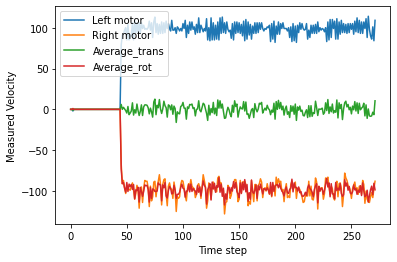

In [9]:
l_speed = [x["left_speed"] for x in thymio_data_turn]
r_speed = [x["right_speed"] for x in thymio_data_turn]
avg_speed_trans = [(x["left_speed"] + x["right_speed"])/2 for x in thymio_data_turn]
avg_speed_rot = [(x["right_speed"] - x["left_speed"])/2 for x in thymio_data_turn]
plt.plot(l_speed, label="Left motor")
plt.plot(r_speed, label="Right motor")
plt.plot(avg_speed_trans, label="Average_trans")
plt.plot(avg_speed_rot, label="Average_rot")
plt.xlabel("Time step")
plt.ylabel("Measured Velocity")
plt.legend()

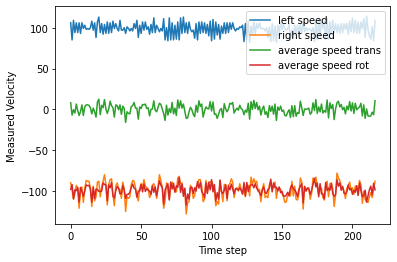

In [10]:
plt.plot(l_speed[55:], label="left speed")
plt.plot(r_speed[55:], label="right speed")
plt.plot(avg_speed_trans[55:], label="average speed trans")
plt.plot(avg_speed_rot[55:], label="average speed rot")
plt.xlabel("Time step")
plt.ylabel("Measured Velocity")
plt.legend()

In [11]:
var_speed_trans = np.var(avg_speed_trans[55:]) * thymio_speed_to_mms**2
var_speed_rot = np.var(avg_speed_rot[55:]) * thymio_speed_to_rads**2

print("The translational speed variance in mm^2/s^2 is {}".format(var_speed_trans))
print("The rotational speed variance in rad^2/s^2 is {}".format(var_speed_rot))

The translational speed variance in mm^2/s^2 is 4.975716349890632
The rotational speed variance in rad^2/s^2 is 0.002077756128607531


 **Assuming that half of the variance is caused by the measurements and half is caused by perturbations to the states, this gives us :**

In [12]:
q_R_x_dot = var_speed_trans/4 # variance on speed state
q_R_y_dot = var_speed_trans/4 # variance on speed state
r_R_x_dot = var_speed_trans/4 # variance on speed measurement
r_R_y_dot = var_speed_trans/4 # variance on speed measurement

q_R_theta_dot = var_speed_rot/2 # variance on speed state
r_R_theta_dot = var_speed_rot/2 # variance on speed measurement
print("q_R_x_dot = {} mm^2/s^2".format(q_R_x_dot))
print("q_R_theta_dot = {} rad^2/s^2 ".format(q_R_theta_dot))

q_R_x_dot = 1.243929087472658 mm^2/s^2
q_R_theta_dot = 0.0010388780643037655 rad^2/s^2 


**Finally we obtain the variances wanted by averaging the case when Thymio turns and the case when it rotates :**

In [13]:
q_x_dot = (q_F_x_dot + q_R_x_dot)/2 # variance on speed state
q_y_dot = (q_F_y_dot + q_R_y_dot)/2 # variance on speed state
r_x_dot = (r_F_x_dot + r_R_x_dot)/2 # variance on speed measurement
r_y_dot = (r_F_y_dot + r_R_y_dot)/2 # variance on speed measurement

q_theta_dot = (q_F_theta_dot + q_R_theta_dot)/2 # variance on speed state
r_theta_dot = (r_F_theta_dot + r_R_theta_dot)/2 # variance on speed measurement
print("q_x_dot = {} mm^2/s^2".format(q_x_dot))
print("q_theta_dot = {} rad^2/s^2 ".format(q_theta_dot))

q_x_dot = 1.0659535061553171 mm^2/s^2
q_theta_dot = 0.0008667718372214265 rad^2/s^2 


$q_\dot x = 1.1 $ mm²/s² <br>
$q_\dot y =  1.1 $ mm²/s² <br>
$q_\dot \theta = 0.00087 $ rad²/s² <br>
$r_\dot x =  1.1 $ mm²/s² <br>
$r_\dot y =  1.1 $ mm²/s² <br>
$r_\dot \theta = 0.00087 $ rad²/s² 

**For the variance of the states we assume that considering that Thymio is always going forward or turning, they can be obtained thanks to the previous variances by multiplying them by Ts²** 

In [14]:
q_x = q_x_dot * Ts**2
q_y = q_y_dot * Ts**2
q_theta = q_theta_dot * Ts**2
print("q_x = {} mm^2/s^2".format(q_x))
print("q_y = {} mm^2/s^2".format(q_y))
print("q_theta = {} rad^2/s^2 ".format(q_theta))

q_x = 0.010659535061553174 mm^2/s^2
q_y = 0.010659535061553174 mm^2/s^2
q_theta = 8.667718372214267e-06 rad^2/s^2 


$q_x = 0.011 $ mm² <br>
$q_y =  0.011 $ mm² <br>
$q_\theta = 0.0000087 $ rad² <br>

**To conclude, we made different measures of position with the camera and we achieved to compute the last needed variances :**

$r_x = 0.025 $ mm² <br>
  $r_y = 0.18 $ mm² <br>
  $r_\theta =  0.00057 $ rad² <br>